In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import powerlaw
from scipy.special import factorial

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally


In [2]:
g = nx.read_gml('Data/graph_actors.gml')


In [3]:
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

def exponential(k, lamb):
    return (1./lamb) * np.exp(-k/lamb)

In [5]:
k = np.asarray([d for d in (dict(g.degree)).values()])

In [6]:
fit = powerlaw.Fit(k, discrete=True)
fit

Calculating best minimal value for power law fit


In [7]:
fit = powerlaw.Fit(k) #Power law fitting on the imported degree
gamma_k = fit.power_law.alpha #Fit to get power law distribution power exponent alpha
sigma_gamma_k = fit.power_law.sigma #sigma is the standard deviation of alpha
print("powerlaw exponent for weights distribution: ", str('%.2f' % (gamma_k)))
print("powerlaw error in the exponent  for weights distribution: ", str('%.10f' % (sigma_gamma_k)))

Calculating best minimal value for power law fit
powerlaw exponent for weights distribution:  2.16
powerlaw error in the exponent  for weights distribution:  0.0032767038


<ipython-input-3-92999f12f644>:2: RuntimeWarning: overflow encountered in power
  return (lamb**k/factorial(k)) * np.exp(-lamb)
<ipython-input-3-92999f12f644>:2: RuntimeWarning: invalid value encountered in true_divide
  return (lamb**k/factorial(k)) * np.exp(-lamb)


Text(0.5, 1.0, 'Actor')

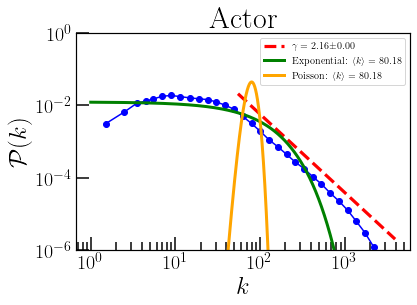

In [11]:
lnspc = np.linspace(np.min(k), np.max(k), len(k))
ymin,ymax = 0.000001,1

fit.power_law.plot_pdf(color='r', linestyle='--', lw=3.2, label=r'$\gamma= \ $'+str('%.2f' % (gamma_k))+'$\pm$'+str('%.2f' % (sigma_gamma_k)))
powerlaw.plot_pdf(k, color='b', marker='o')
plt.plot(lnspc, exponential(lnspc,np.average(k)), label=r"Exponential: $\langle k \rangle  = \ $"+str('%.2f' % (np.average(k))),color='green',lw=3) # plot it
plt.plot(lnspc, poisson(lnspc,np.average(k)), label=r"Poisson: $\langle k \rangle  = \ $"+str('%.2f' % (np.average(k))),color='orange',lw=3) # plot it
plt.legend(loc='best',prop={'size':10},frameon=True)
plt.ylim(ymin,ymax)
plt.tick_params(which = 'major', axis='both', width=1.5, length = 13, labelsize=20,direction='in')
plt.tick_params(which = 'minor', axis='both', width=1.5, length = 8, labelsize=20,direction='in')
plt.xlabel("$k$", fontsize=25)
plt.ylabel("$\mathcal{P}(k)$", fontsize=25)
plt.title('Actor', fontsize=30)

In [9]:
headers = ['_amazon','_internet','_escort']
titles = ['Amazon','Internet','Escort']

In [18]:
glist = []
for hh in headers:
    glist.append(nx.read_gml('Data/graph'+hh+'.gml'))

Calculating best minimal value for power law fit
powerlaw exponent for weights distribution:  4.07
powerlaw error in the exponent  for weights distribution:  0.0969931911


<ipython-input-3-92999f12f644>:2: RuntimeWarning: overflow encountered in power
  return (lamb**k/factorial(k)) * np.exp(-lamb)
<ipython-input-3-92999f12f644>:2: RuntimeWarning: invalid value encountered in true_divide
  return (lamb**k/factorial(k)) * np.exp(-lamb)


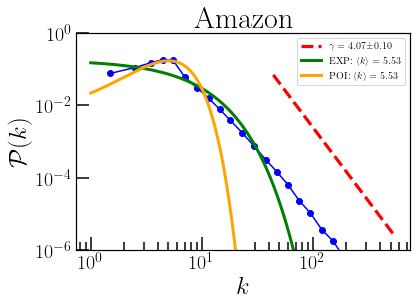

Calculating best minimal value for power law fit
powerlaw exponent for weights distribution:  2.11
powerlaw error in the exponent  for weights distribution:  0.0366878070


<ipython-input-3-92999f12f644>:2: RuntimeWarning: overflow encountered in power
  return (lamb**k/factorial(k)) * np.exp(-lamb)
<ipython-input-3-92999f12f644>:2: RuntimeWarning: invalid value encountered in true_divide
  return (lamb**k/factorial(k)) * np.exp(-lamb)


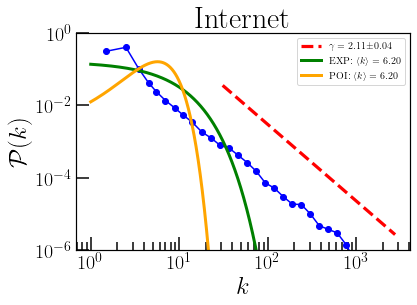

Calculating best minimal value for power law fit
powerlaw exponent for weights distribution:  2.95
powerlaw error in the exponent  for weights distribution:  0.0791972939


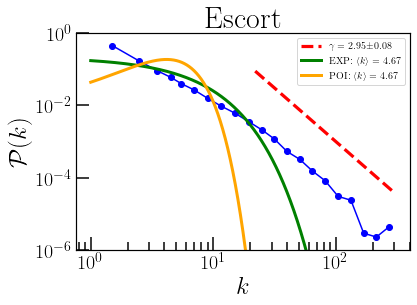

In [19]:
for ii in range(len(glist)):
    title = titles[ii]
    g = glist[ii]
    k = np.asarray([d for d in (dict(g.degree)).values()])
    fit = powerlaw.Fit(k)
    gamma_k = fit.power_law.alpha
    sigma_gamma_k = fit.power_law.sigma
    print("powerlaw exponent for weights distribution: ", str('%.2f' % (gamma_k)))
    print("powerlaw error in the exponent  for weights distribution: ", str('%.10f' % (sigma_gamma_k)))

    lnspc = np.linspace(np.min(k), np.max(k), len(k))
    ymin,ymax = 0.000001,1

    fit.power_law.plot_pdf(color='r', linestyle='--', lw=3.2, label=r'$\gamma= \ $'+str('%.2f' % (gamma_k))+'$\pm$'+str('%.2f' % (sigma_gamma_k)))
    powerlaw.plot_pdf(k, color='b', marker='o')
    plt.plot(lnspc, exponential(lnspc,np.average(k)), label=r"EXP: $\langle k \rangle  = \ $"+str('%.2f' % (np.average(k))),color='green',lw=3) # plot it
    plt.plot(lnspc, poisson(lnspc,np.average(k)), label=r"POI: $\langle k \rangle  = \ $"+str('%.2f' % (np.average(k))),color='orange',lw=3) # plot it
    plt.legend(loc='best',prop={'size':10},frameon=True)
    plt.ylim(ymin,ymax)
    plt.tick_params(which = 'major', axis='both', width=1.5, length = 13, labelsize=20,direction='in')
    plt.tick_params(which = 'minor', axis='both', width=1.5, length = 8, labelsize=20,direction='in')
    plt.xlabel("$k$", fontsize=25)
    plt.ylabel("$\mathcal{P}(k)$", fontsize=25)
    plt.title(title, fontsize=30)
    plt.show()
    plt.close("all")

In [20]:
rangeN = [50, 100, 500, 1000, 5000]

gbaralist = []
for nn in rangeN:  
    gbaralist.append(nx.barabasi_albert_graph(nn, 3))

In [21]:
gbararanlist = []
for ii in range(len(gbaralist)):  
    gran = nx.smallworld.random_reference(gbaralist[ii], niter=10, connectivity=False)#Compute a random graph by swapping edges of a given graph.
    gbararanlist.append(gran)
    print(rangeN[ii], 'Done')

50 Done
100 Done
500 Done
1000 Done
5000 Done


In [22]:
for ii in range(len(gbaralist)): 
    print(nx.is_connected(gbaralist[ii]))

True
True
True
True
True


In [23]:
clustlist = []
assotlist = []
avdislist = []
diamlist = []

clustranlist = []
assotranlist = []
avdisranlist = []
diamranlist = []

for ii in range(len(gbaralist)): 
    
    clustlist.append(nx.average_clustering(gbaralist[ii]))
    assotlist.append(nx.degree_assortativity_coefficient(gbaralist[ii]))
    avdislist.append(nx.average_shortest_path_length(gbaralist[ii]))
    diamlist.append(nx.diameter(gbaralist[ii]))
    
    clustranlist.append(nx.average_clustering(gbararanlist[ii]))
    assotranlist.append(nx.degree_assortativity_coefficient(gbararanlist[ii]))
    avdisranlist.append(nx.average_shortest_path_length(gbararanlist[ii]))
    diamranlist.append(nx.diameter(gbararanlist[ii]))

    print(rangeN[ii], 'Done')

50 Done
100 Done
500 Done
1000 Done
5000 Done


In [24]:
for ii in range(len(gbaralist)):  
    print('N',rangeN[ii])
    
    print('C', str('%.2f' % (clustlist[ii])), '-->',  'Cran', str('%.2f' % (clustranlist[ii])))
    print('r', str('%.2f' % (assotlist[ii])), '-->',  'rran', str('%.2f' % (assotranlist[ii])))
    print('D', str('%.2f' % (avdislist[ii])), '-->',  'Dran', str('%.2f' % (avdisranlist[ii])))
    print('d', str('%.2f' % (diamlist[ii])), '-->', 'dran', str('%.2f' % (diamranlist[ii])))

N 50
C 0.18 --> Cran 0.24
r -0.14 --> rran -0.15
D 2.32 --> Dran 2.37
d 4.00 --> dran 4.00
N 100
C 0.15 --> Cran 0.13
r -0.13 --> rran -0.07
D 2.63 --> Dran 2.68
d 5.00 --> dran 5.00
N 500
C 0.05 --> Cran 0.04
r -0.11 --> rran -0.05
D 3.24 --> Dran 3.32
d 5.00 --> dran 6.00
N 1000
C 0.03 --> Cran 0.03
r -0.07 --> rran -0.04
D 3.50 --> Dran 3.58
d 6.00 --> dran 6.00
N 5000
C 0.01 --> Cran 0.01
r -0.05 --> rran -0.02
D 4.09 --> Dran 4.15
d 7.00 --> dran 7.00


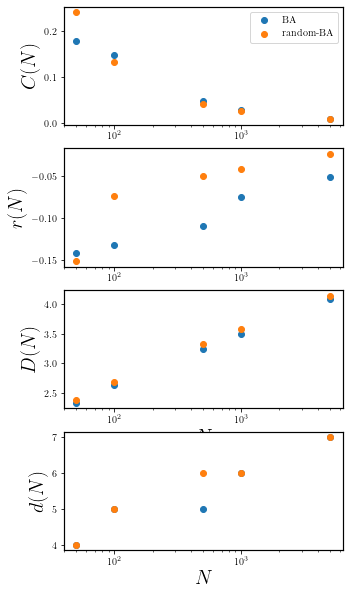

In [26]:
fig = plt.figure(figsize=(5, 10))

ax1=fig.add_subplot(4,1,1)
ax1.scatter(rangeN, clustlist, label='BA')
ax1.scatter(rangeN, clustranlist, label='random-BA')
# ax1.set_xlabel("$N$", fontsize=20)
ax1.set_ylabel("$C(N)$", fontsize=20)
ax1.set_xscale('log')
plt.legend(loc='best', fontsize=10)


ax2=fig.add_subplot(4,1,2)
ax2.scatter(rangeN, assotlist, label='Assortativity BA')
ax2.scatter(rangeN, assotranlist, label='Assortativity random')
# ax2.set_xlabel("$N$", fontsize=20)
ax2.set_ylabel("$r(N)$", fontsize=20)
ax2.set_xscale('log')


ax3=fig.add_subplot(4,1,3)
ax3.scatter(rangeN, avdislist, label='Average Path Length BA')
ax3.scatter(rangeN, avdisranlist, label='Average Path Length random')
ax3.set_xlabel("$N$", fontsize=20)
ax3.set_ylabel("$D(N)$", fontsize=20)
ax3.set_xscale('log')

ax4=fig.add_subplot(4,1,4)
ax4.scatter(rangeN, diamlist, label='Diameter BA')
ax4.scatter(rangeN, diamranlist, label='Diameter random')
ax4.set_xlabel("$N$", fontsize=20)
ax4.set_ylabel("$d(N)$", fontsize=20)
ax4.set_xscale('log')